In [1]:
import pandas as pd
from glob import glob
import uproot4 as uproot
from os.path import join
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplhep as hep
hep.style.use("CMS")

In [2]:
file = "/home/nkarunar/hit_root_files/9007.root"  
# file0 = "/home/nkarunar/hit_root_files/8997_0.root"  
# file1 = "/home/nkarunar/hit_root_files/8997_1.root"
# file2 = "/home/nkarunar/hit_root_files/8997_2.root"

In [3]:

tree0 = uproot.open(f'{file0}:T')
tree1 = uproot.open(f'{file1}:T')
tree2 = uproot.open(f'{file2}:T')

# nentries = tree.num_entries

In [4]:
tree0.num_entries, tree1.num_entries, tree2.num_entries

(1054317, 26108, 3849)

In [5]:
tree0.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
hits                 | int32_t                  | AsDtype('>i4')
event                | int32_t                  | AsDtype('>i4')
timesec              | int32_t                  | AsDtype('>i4')
timemsec             | int32_t                  | AsDtype('>i4')
bx                   | int32_t                  | AsDtype('>i4')
channel              | int32_t[]                | AsJagged(AsDtype('>i4'))
roc                  | int32_t[]                | AsJagged(AsDtype('>i4'))
row                  | int32_t[]                | AsJagged(AsDtype('>i4'))
col                  | int32_t[]                | AsJagged(AsDtype('>i4'))
pulseHeight          | int32_t[]                | AsJagged(AsDtype('>i4'))


In [11]:
bxt0 = tree0.arrays(["timesec", "bx"], library="pd")
bxt1 = tree1.arrays(["timesec", "bx"], library="pd")
bxt2 = tree2.arrays(["timesec", "bx"], library="pd")

/home/karunar/miniconda3/envs/work/lib/python3.9/site-packages/uproot4/interpretation/library.py:659: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)
/home/karunar/miniconda3/envs/work/lib/python3.9/site-packages/uproot4/interpretation/library.py:659: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)
/home/karunar/miniconda3/envs/work/lib/python3.9/site-packages/uproot4/interpretation/library.py:659: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index

In [70]:
# concatenate
# bxt = pd.concat([bxt0, bxt1, bxt2])
bxt = pd.concat([bxt1, bxt2])

In [71]:
bxt.sort_values(by=['timesec'], inplace=True)

In [72]:
# bxt = pd.read_csv("bx.csv")

In [73]:
bxt
# convert timesec to datetime
bxt['newtime'] = pd.to_datetime(bxt['timesec'], unit='s')

# add 1 to bx
bxt['bx'] = bxt['bx'] + 1


In [74]:
bxt

,timesec,bx,newtime
0,1687962694,790,2023-06-28 14:31:34
1,1687962694,250,2023-06-28 14:31:34
2,1687962694,2158,2023-06-28 14:31:34
3,1687962694,1755,2023-06-28 14:31:34
4,1687962694,229,2023-06-28 14:31:34
...,...,...,...
3844,1687965528,113,2023-06-28 15:18:48
3845,1687965529,3413,2023-06-28 15:18:49
3846,1687965530,1564,2023-06-28 15:18:50
3847,1687965533,929,2023-06-28 15:18:53


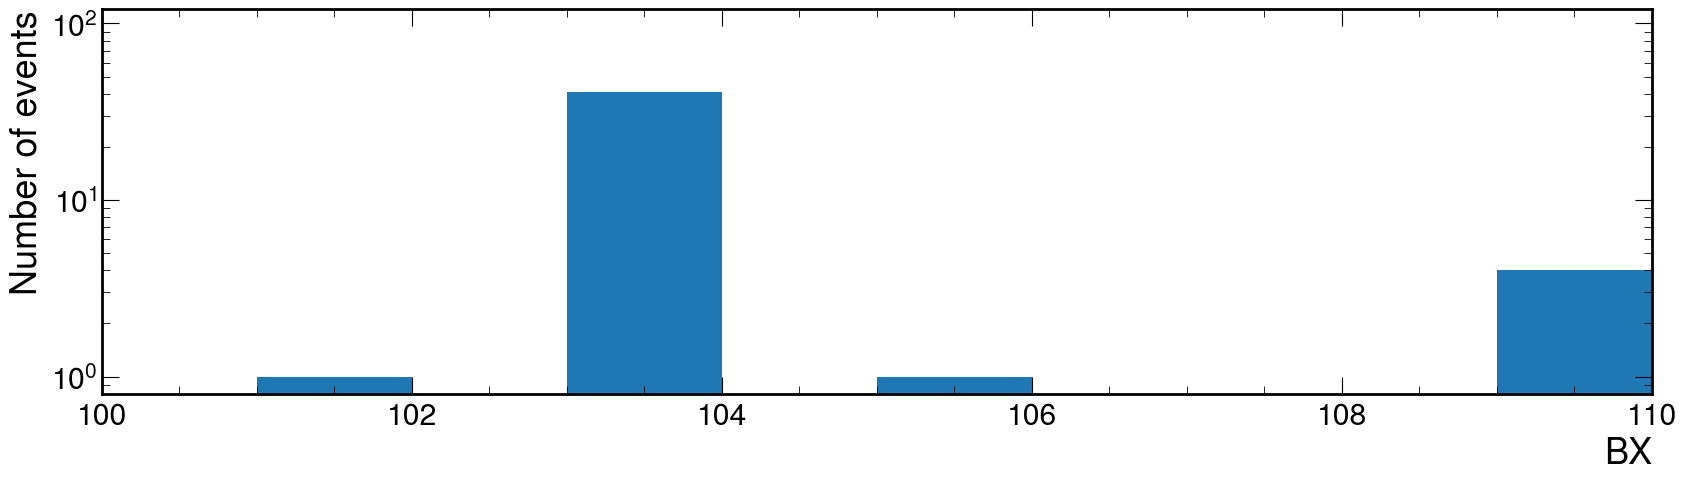

In [75]:
plt.figure(figsize=(20, 5))
plt.hist(bxt.bx, bins=3564, range=(0, 3564))
plt.xlabel("BX")
plt.ylabel("Number of events")
plt.xlim(100, 110)
plt.yscale("log")


In [76]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

date_format = mdates.DateFormatter('%H:%M:%S')

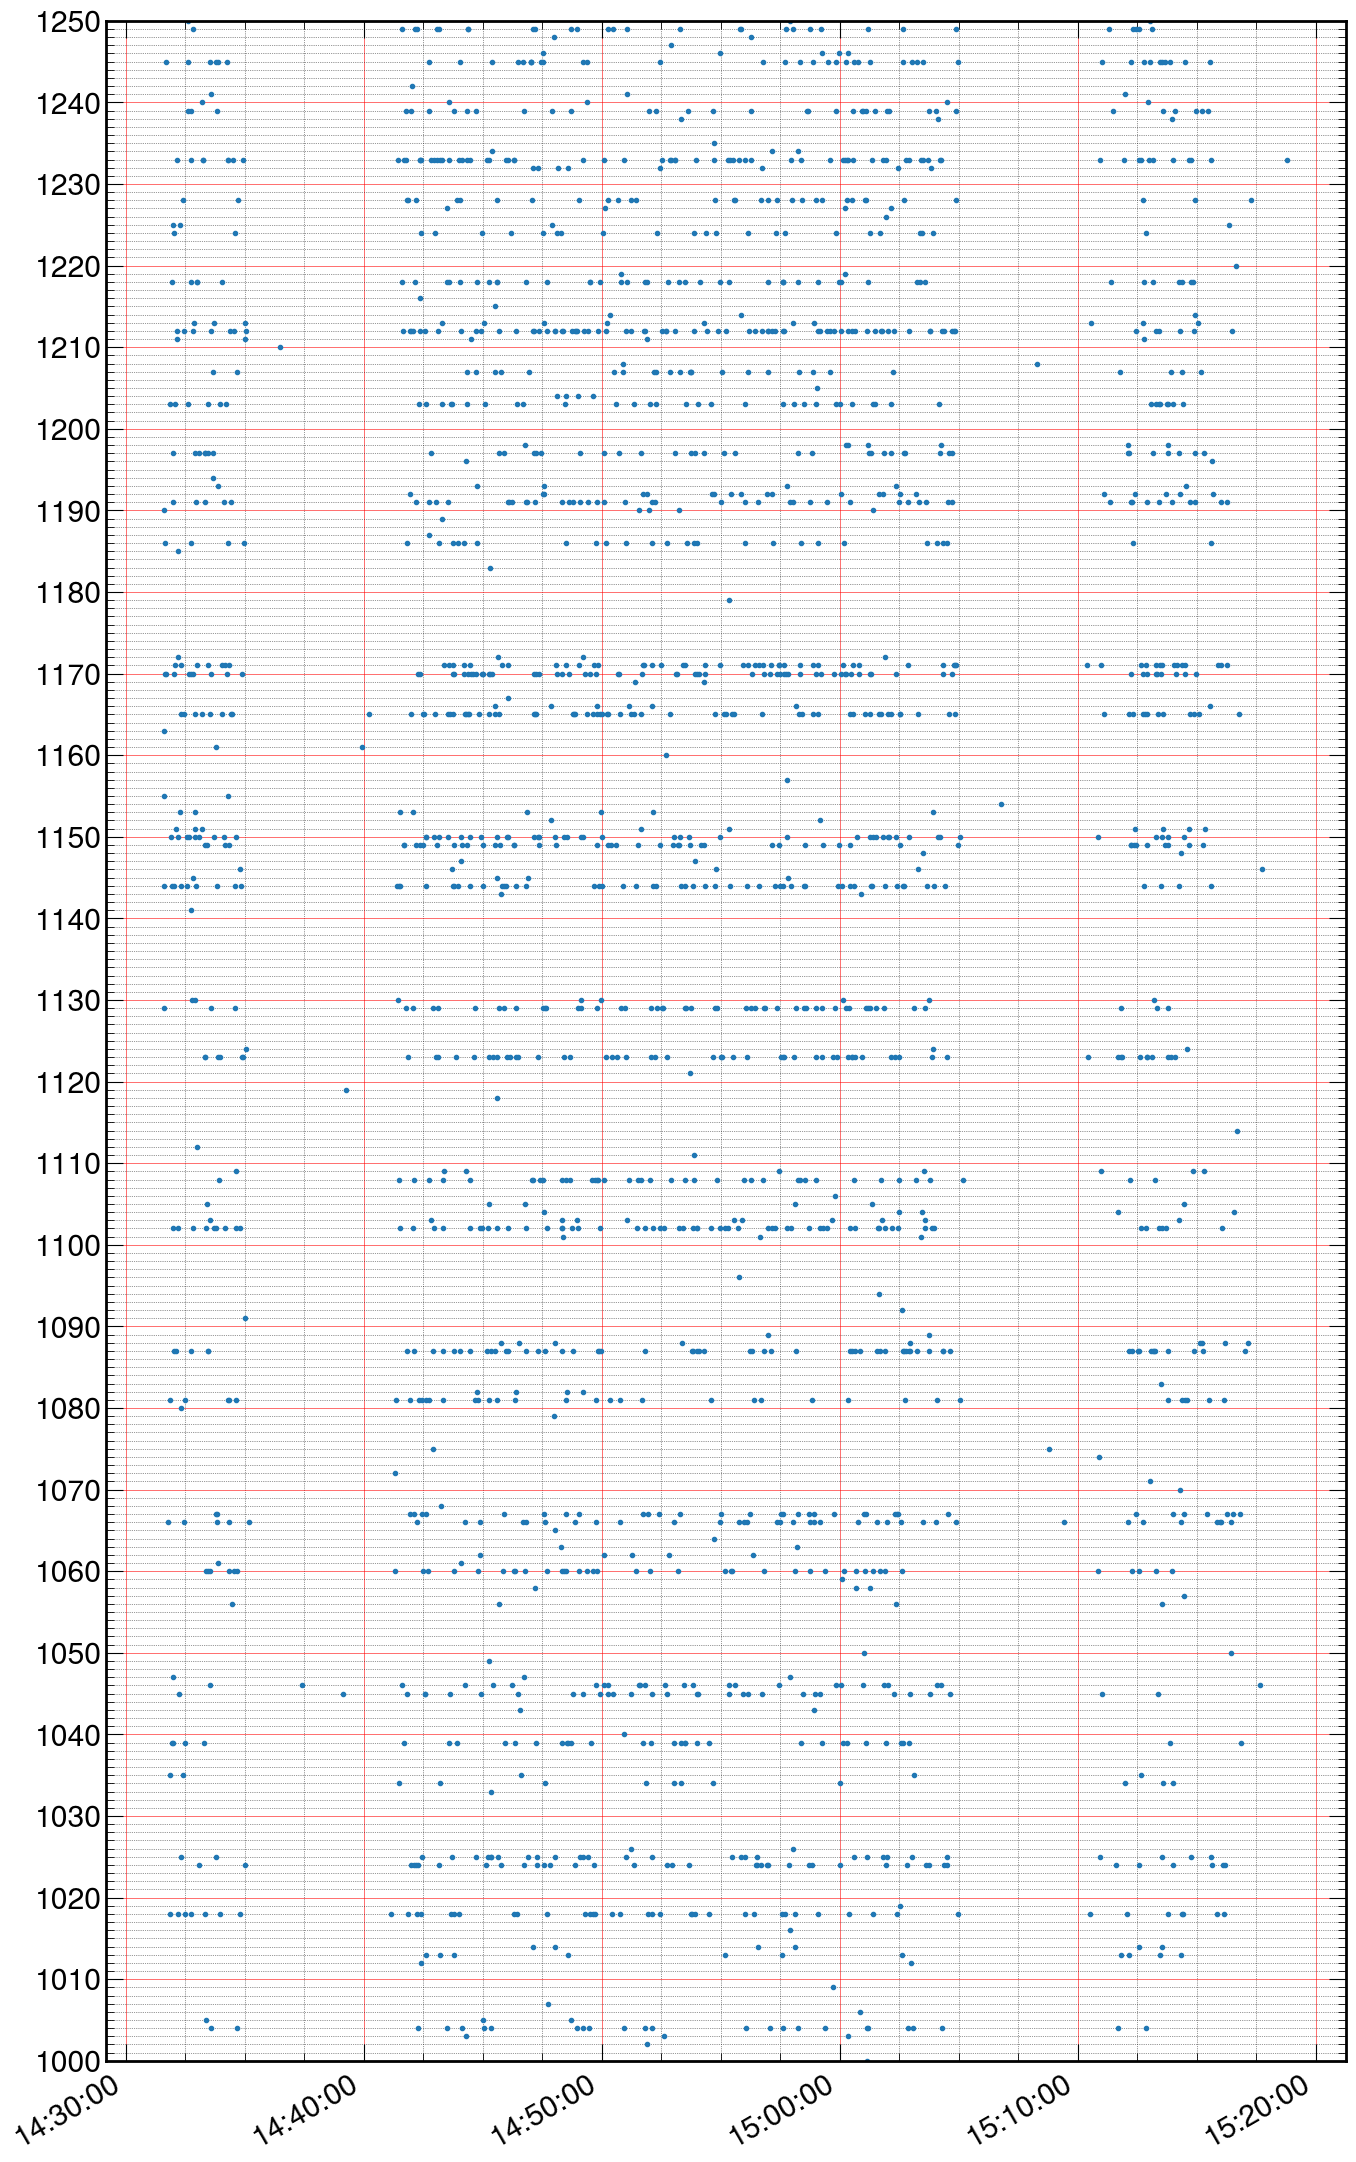

In [96]:
fig, ax = plt.subplots(figsize=(16, 30))
ax.plot(bxt['newtime'], bxt.bx, '.')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()
plt.ylim(1000, 1250)

# turn on minor ticks
ax.minorticks_on()
# set major and minor ticks

# ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=5))
# ax.xaxis.set_minor_locator(mdates.MinuteLocator(interval=1))
ax.yaxis.set_major_locator(plt.MultipleLocator(10))
ax.yaxis.set_minor_locator(plt.MultipleLocator(1))


# grid for major axis and minor axis on both x and y axis
ax.grid(which='major', axis='both', linestyle='-', linewidth='0.5', color='red')
ax.grid(which='minor', axis='both', linestyle=':', linewidth='0.5', color='black')
# y axis minor tick labels

plt.savefig('test2.png', dpi=600)
plt.show()

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


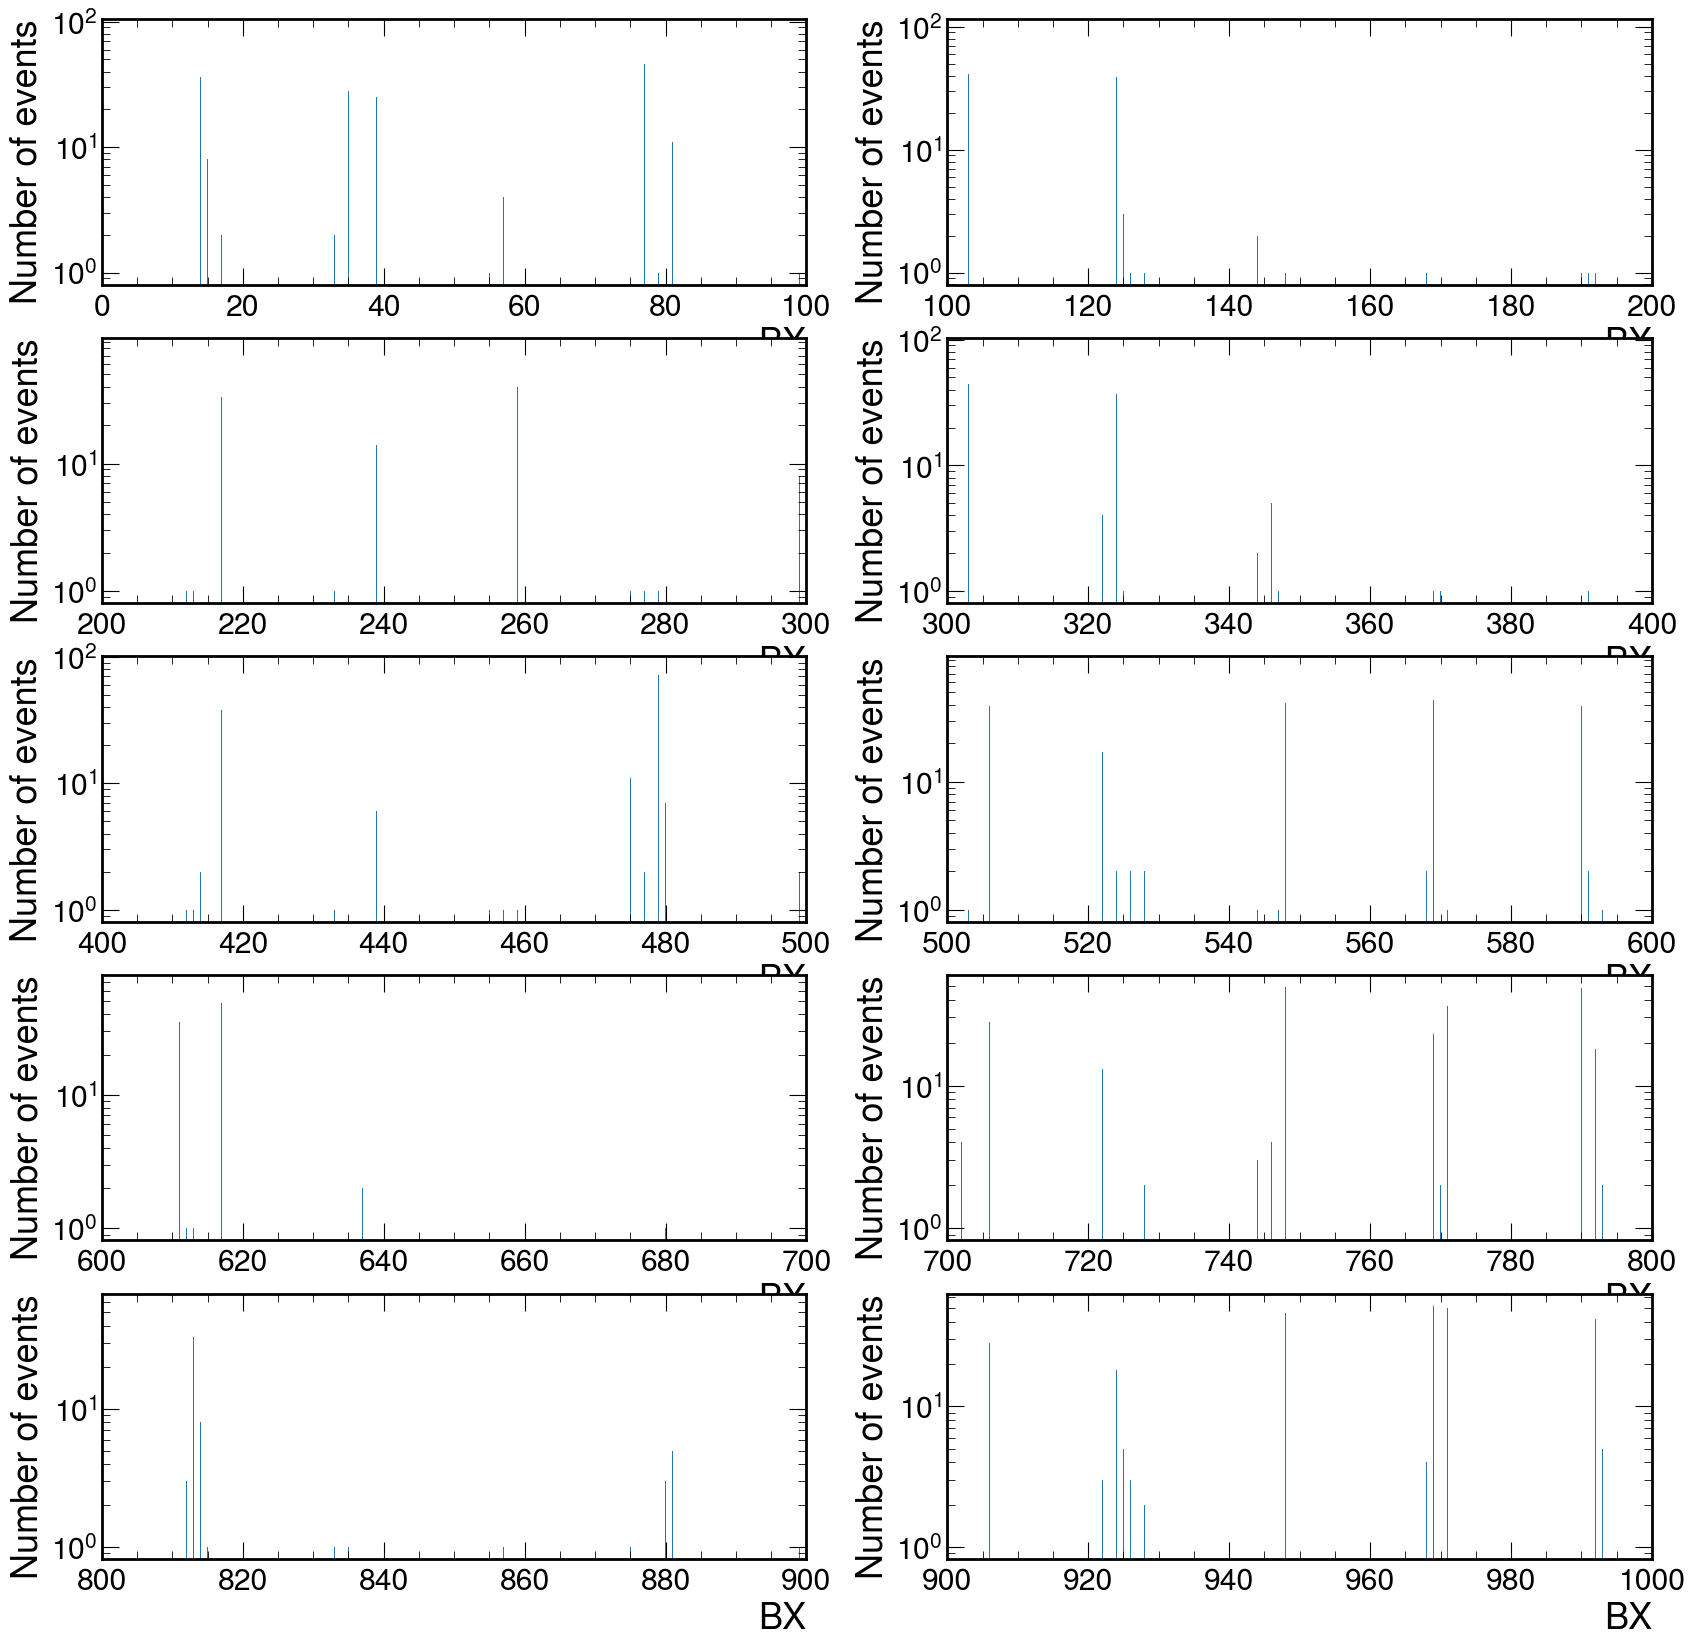

In [88]:
# histogram y range in multiple plots. each plot has a range 100
plt.figure(figsize=(20, 20))

for i in range(0, 10):
    plt.subplot(5, 2, i+1)
    plt.hist(bxt.bx, bins=3564, range=(i*100, (i+1)*100))
    plt.xlabel("BX")
    plt.ylabel("Number of events")
    plt.xlim(i*100, (i+1)*100)
    plt.yscale("log")